In [1]:
# pip install powershap

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import itertools
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from matplotlib.pyplot import figure
import random
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.inspection import permutation_importance
import missingno as msno
import pydot
from IPython.display import Image
# import shap
# from powershap import PowerShap

## Data Preparation <a class="anchor" id="dataPreparation"></a>
This is data preparation

In [3]:
# Mount the drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# data = pd.read_csv("/content/drive/MyDrive/DMSL project/MushroomDataset/secondary_data.csv", sep=";")
data = pd.read_csv("/content/drive/MyDrive/DMSL project/MushroomDataset/mushroom_with_levels.csv")
data.head()

,class,cap.diameter,cap.shape,cap.surface,cap.color,does.bruise.or.bleed,gill.attachment,gill.spacing,gill.color,stem.height,...,stem.root,stem.surface,stem.color,veil.type,veil.color,has.ring,ring.type,spore.print.color,habitat,season
0,poisonous,15.26,convex,grooves,orange,no,free,NaN,white,16.95,...,swollen,scaly,white,universal,white,ring,grooved,NaN,Woods,Winter
1,poisonous,16.60,convex,grooves,orange,no,free,NaN,white,17.99,...,swollen,scaly,white,universal,white,ring,grooved,NaN,Woods,Summer
2,poisonous,14.07,convex,grooves,orange,no,free,NaN,white,17.80,...,swollen,scaly,white,universal,white,ring,grooved,NaN,Woods,Winter
3,poisonous,14.17,flat,shiny,red,no,free,NaN,white,15.77,...,swollen,scaly,white,universal,white,ring,pendant,NaN,Woods,Winter
4,poisonous,14.64,convex,shiny,orange,no,free,NaN,white,16.53,...,swollen,scaly,white,universal,white,ring,pendant,NaN,Woods,Winter


In [5]:
# summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap.diameter          61069 non-null  float64
 2   cap.shape             61069 non-null  object 
 3   cap.surface           42517 non-null  object 
 4   cap.color             61069 non-null  object 
 5   does.bruise.or.bleed  61069 non-null  object 
 6   gill.attachment       51185 non-null  object 
 7   gill.spacing          36006 non-null  object 
 8   gill.color            61069 non-null  object 
 9   stem.height           61069 non-null  float64
 10  stem.width            61069 non-null  float64
 11  stem.root             8472 non-null   object 
 12  stem.surface          22945 non-null  object 
 13  stem.color            61069 non-null  object 
 14  veil.type             3177 non-null   object 
 15  veil.color         

### EDA <a class="anchor" id="eda"></a>
This is exploratory data analysis

In [6]:
# convert stem.height and cap.diameter to mm
data['stem.height'] = data['stem.height'].apply(lambda x: float(x*10))
data['cap.diameter'] = data['cap.diameter'].apply(lambda x: float(x*10))

In [7]:
# check missing values
def get_missing_values(df):

  percent_missing = df.isnull().sum() * 100 / len(df)
  missing_value_df = pd.DataFrame({'Column Name': df.columns,
                                  '% Missing values': round(percent_missing, 2)}).reset_index(drop=True)

  missing_value_df.sort_values('% Missing values', ascending=False, inplace=True)
  return missing_value_df.reset_index(drop=True)


get_missing_values(data)

,Column Name,% Missing values
0,veil.type,94.80
1,spore.print.color,89.60
2,veil.color,87.86
3,stem.root,86.13
4,stem.surface,62.43
5,gill.spacing,41.04
6,cap.surface,30.38
7,gill.attachment,16.18
8,ring.type,4.05
9,habitat,0.59


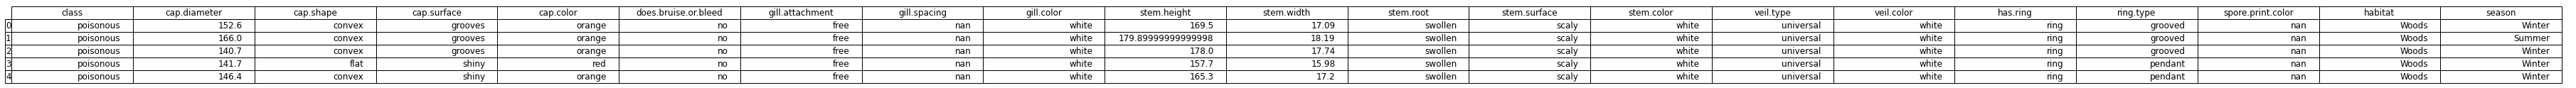

In [8]:
from pandas.plotting import table
fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, data.head(), loc='upper right', colWidths=[0.17]*len(data.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.5, 1.5) # change size table
plt.savefig('/content/drive/MyDrive/DMSL project/MushroomDataset/data.png', transparent=True)

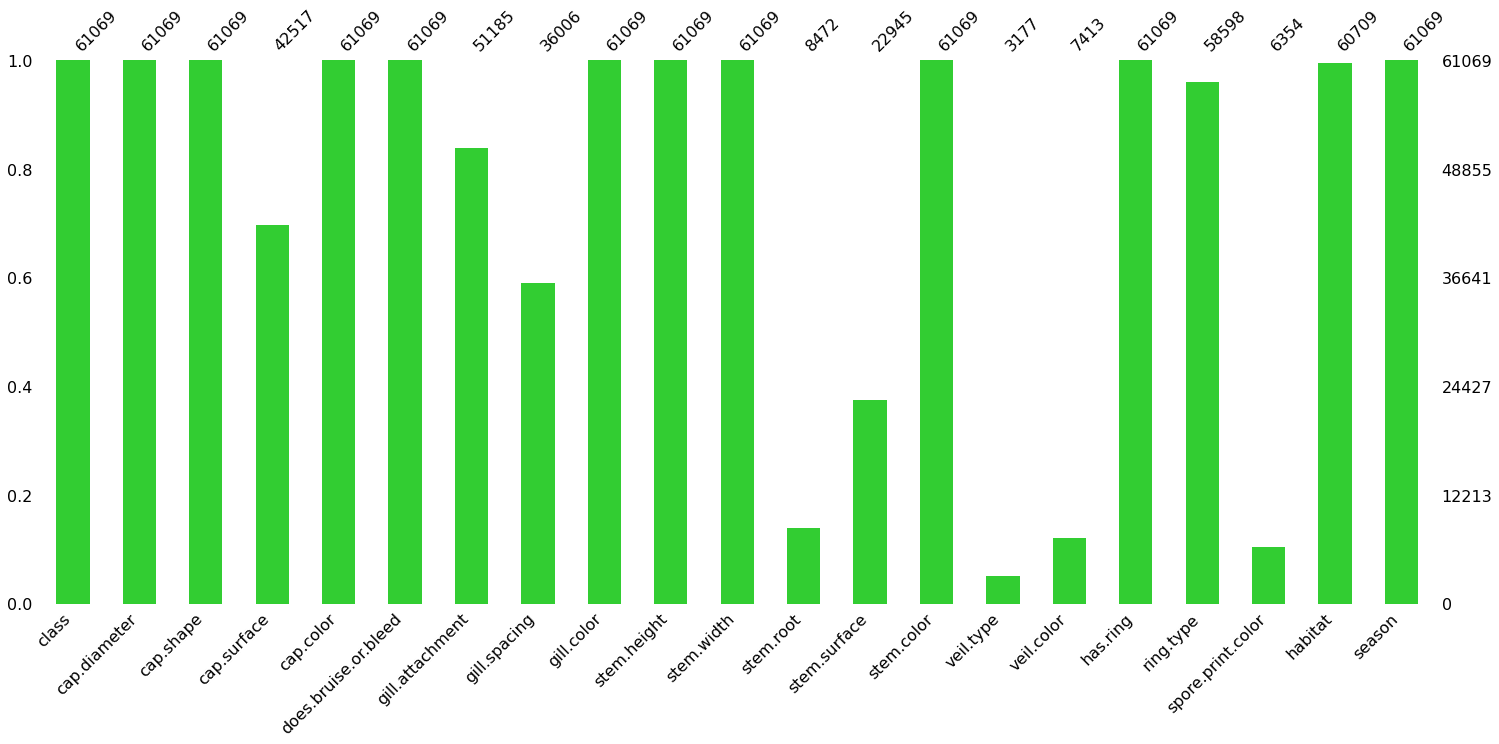

<Figure size 432x288 with 0 Axes>

In [9]:
# Gives a bar chart of the missing values
msno.bar(data, color="limegreen")
plt.show()
plt.savefig('/content/drive/MyDrive/DMSL project/MushroomDataset/missingVals.png', transparent=True)

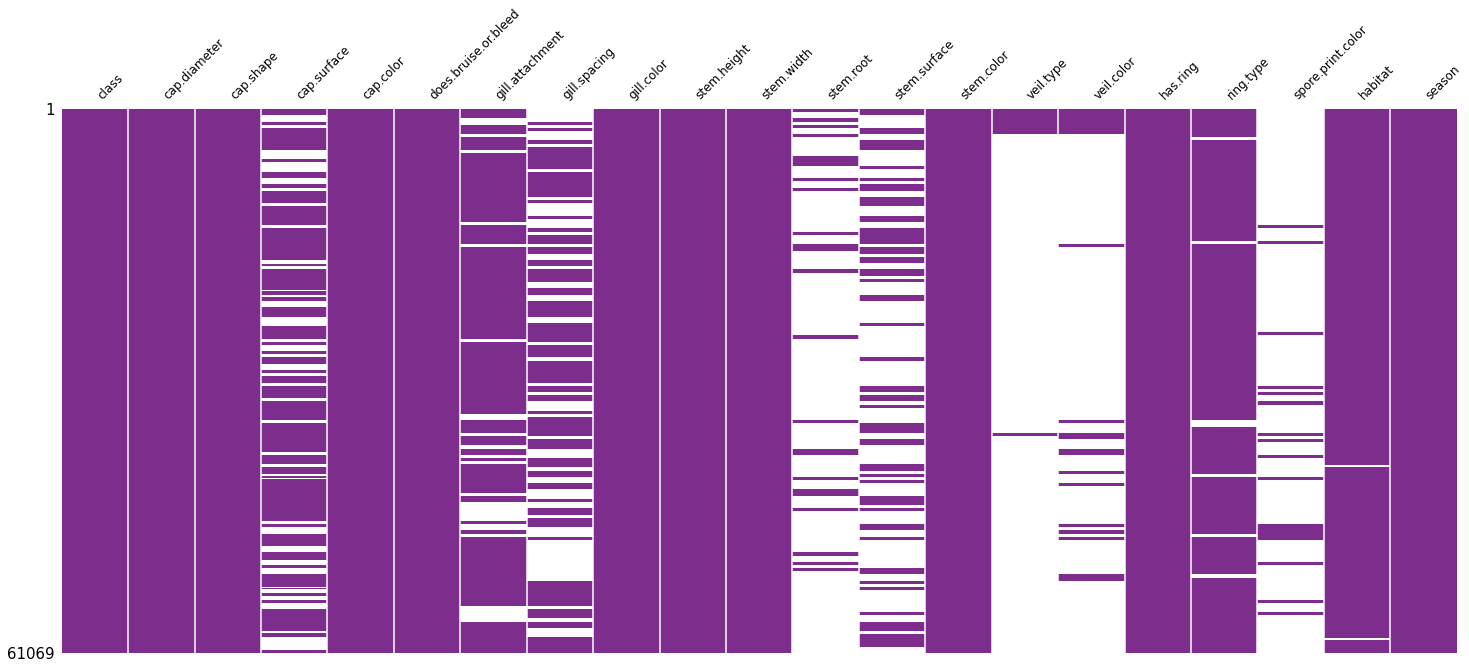

<Figure size 432x288 with 0 Axes>

In [10]:
# Shows where the data is missing.  It also has the sparkline on the side where it shows there are minimum of 13 colummns that always have data and a maximum of 19 columns with data less often
msno.matrix(data, fontsize=12, sparkline=False, color=(0.494, 0.184, 0.556))
plt.show()
plt.savefig('/content/drive/MyDrive/DMSL project/MushroomDataset/missingValsMatrix.png', transparent=True)

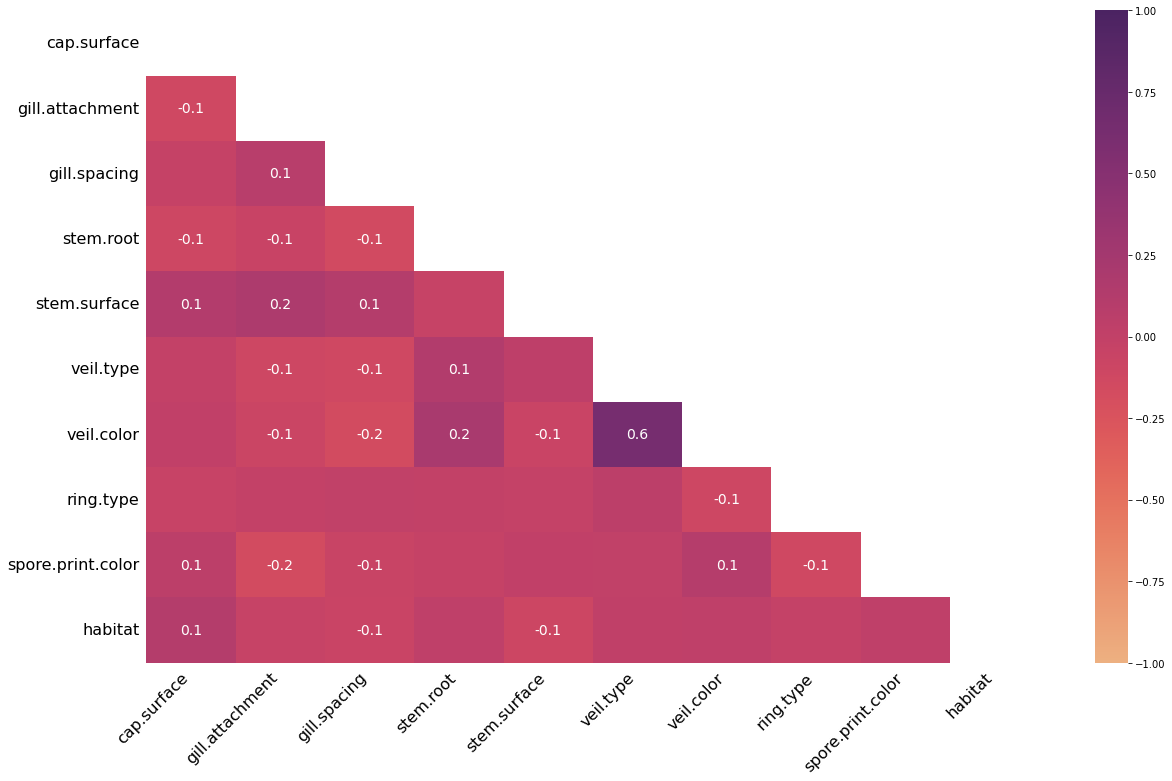

In [11]:
# Gives a heatmap of how missing values are related
msno.heatmap(data, cmap="flare")
plt.show()

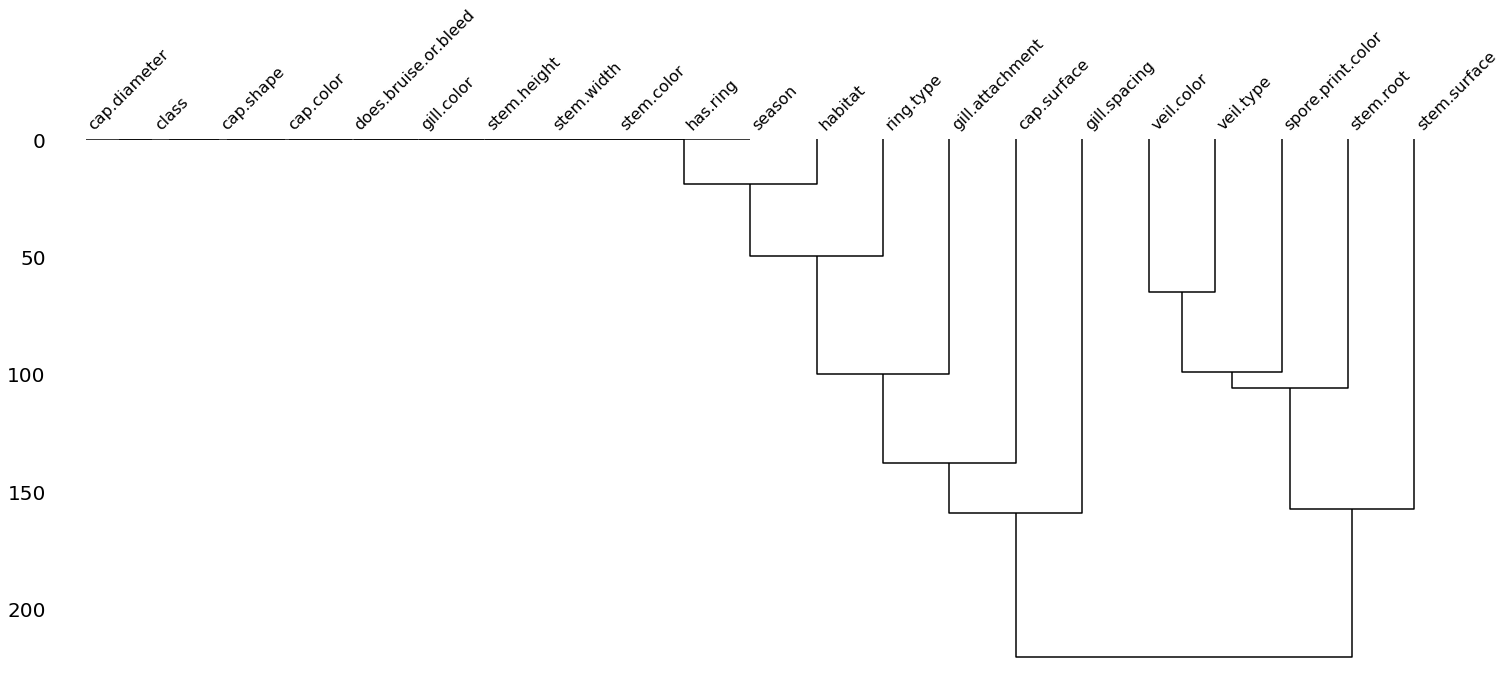

In [12]:
''' Shows the correlation between the missing data columns.  This uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation. 
Cluster leaves which linked together at a distance of zero fully predict one another’s presence. https://mathdatasimplified.com/2021/10/04/missingno-dendogram-visualize-correlation-between-missing-data/
'''
msno.dendrogram(data)
plt.show()

### Outlier detection in continous variables

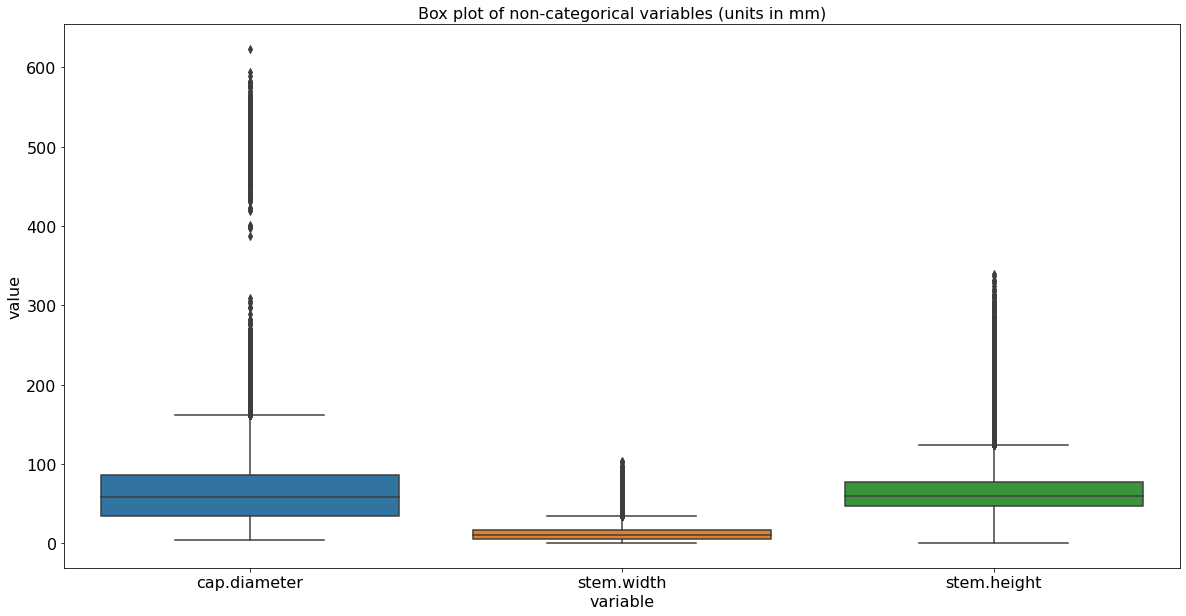

In [13]:
fig = plt.figure(figsize =(20, 10))
plt.rcParams.update({'font.size': 16})
sns.boxplot(x="variable", y="value", data=pd.melt(data[["cap.diameter", "stem.width", "stem.height"]]))
plt.title("Box plot of non-categorical variables (units in mm)", fontsize=16)
plt.show()

In [14]:
# IQR, above upper and lower bounds
def quartiles_iqr(df, colname):

  Q1 = np.percentile(df[colname], 25, interpolation = 'midpoint') 
  Q3 = np.percentile(df[colname], 75, interpolation = 'midpoint') 
  IQR = Q3 - Q1
  
  return Q1, Q3, IQR

def get_upper_lower_bounds(df, colname):
  Q1, Q3, IQR = quartiles_iqr(df, colname)

  # Above Upper bound
  upper = df[colname] >= (Q3 + 1.5 * IQR)

  # Below Lower bound
  lower = df[colname] <= (Q1 - 1.5 * IQR)

  return upper, lower

upper_cd, lower_cd = get_upper_lower_bounds(data, "cap.diameter")

print("Upper bound:",upper_cd)
print(np.where(upper_cd))

print("Lower bound:", lower_cd)
print(np.where(lower_cd))


Upper bound: 0        False
1         True
2        False
3        False
4        False
         ...  
61064    False
61065    False
61066    False
61067    False
61068    False
Name: cap.diameter, Length: 61069, dtype: bool
(array([    1,    12,    13, ..., 58948, 58949, 58950]),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
61064    False
61065    False
61066    False
61067    False
61068    False
Name: cap.diameter, Length: 61069, dtype: bool
(array([], dtype=int64),)


<ipython-input-14-21a370ae81ec>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[colname], 25, interpolation = 'midpoint')
<ipython-input-14-21a370ae81ec>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[colname], 75, interpolation = 'midpoint')


In [15]:
upper_sw, lower_sw = get_upper_lower_bounds(data, "stem.width")

print("Upper bound:",upper_sw)
print(np.where(upper_sw))

print("Lower bound:", lower_sw)
print(np.where(lower_sw))

Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
61064    False
61065    False
61066    False
61067    False
61068    False
Name: stem.width, Length: 61069, dtype: bool
(array([17310, 17311, 17331, ..., 59618, 59619, 59646]),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
61064    False
61065    False
61066    False
61067    False
61068    False
Name: stem.width, Length: 61069, dtype: bool
(array([], dtype=int64),)


<ipython-input-14-21a370ae81ec>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[colname], 25, interpolation = 'midpoint')
<ipython-input-14-21a370ae81ec>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[colname], 75, interpolation = 'midpoint')


In [16]:
upper_sh, lower_sh = get_upper_lower_bounds(data, "stem.height")

print("Upper bound:",upper_sh)
print(np.where(upper_sh))

print("Lower bound:", lower_sh)
print(np.where(lower_sh))

Upper bound: 0         True
1         True
2         True
3         True
4         True
         ...  
61064    False
61065    False
61066    False
61067    False
61068    False
Name: stem.height, Length: 61069, dtype: bool
(array([    0,     1,     2, ..., 52232, 52233, 52240]),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
61064    False
61065    False
61066    False
61067    False
61068    False
Name: stem.height, Length: 61069, dtype: bool
(array([], dtype=int64),)


<ipython-input-14-21a370ae81ec>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[colname], 25, interpolation = 'midpoint')
<ipython-input-14-21a370ae81ec>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[colname], 75, interpolation = 'midpoint')


In [17]:
def get_outlier_indices(df, columns=['cap.diameter', 'stem.width', 'stem.height']):
	# initialize an empty dictionary
	outlier_indices = {}
	
	for col in columns:
		# get upper and lower bounds
		upper, lower = get_upper_lower_bounds(df, col)
		
		# get indices of each
		indices = np.where(upper) + np.where(lower)
		
		# populate the dictionary
		outlier_indices[col] = indices
	
	return outlier_indices

In [18]:
outliers_arrays = get_outlier_indices(data)
arr1 = outliers_arrays['cap.diameter'][0]
arr2 = outliers_arrays['stem.height'][0]
arr3 = outliers_arrays['stem.width'][0]
outliers_indices = np.concatenate((arr1,arr2,arr3))
outliers = list(set(outliers_indices))
len(outliers)

<ipython-input-14-21a370ae81ec>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[colname], 25, interpolation = 'midpoint')
<ipython-input-14-21a370ae81ec>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[colname], 75, interpolation = 'midpoint')


5341

In [19]:
# drop columns with 65% or more missing values
df = data.copy()
df_trimmed = df.dropna(thresh=df.shape[0]*0.65, how='all',axis=1)
cols = df_trimmed.columns

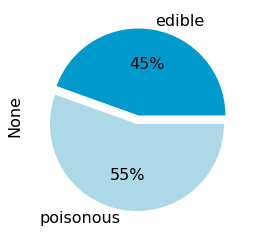

<Figure size 432x288 with 0 Axes>

In [20]:
# plotting
color_palette_list = ['#009ACD', '#ADD8E6']
df.groupby('class').size().plot(kind='pie', y='class', autopct='%1.0f%%',colors=color_palette_list, explode=[0, 0.1])
plt.show()
plt.savefig('/content/drive/MyDrive/DMSL project/MushroomDataset/classProportion.png', transparent=True)

### Missing value  Imputation

In [21]:
# imputing missing values using the most frequent method

# impute missing values using KNN
def most_freq_imputation(data):
  from sklearn.impute import SimpleImputer

  imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
  return imputer.fit_transform(data)

df_imput = most_freq_imputation(df_trimmed)
df_imputted = pd.DataFrame(df_imput, columns=cols)

In [22]:
get_missing_values(df_imputted)

,Column Name,% Missing values
0,class,0.0
1,cap.diameter,0.0
2,cap.shape,0.0
3,cap.surface,0.0
4,cap.color,0.0
5,does.bruise.or.bleed,0.0
6,gill.attachment,0.0
7,gill.color,0.0
8,stem.height,0.0
9,stem.width,0.0


In [23]:
# cast numeric columns

df_imputted[['cap.diameter', 'stem.width', 'stem.height']] =  df_imputted[['cap.diameter', 'stem.width', 'stem.height']].apply(pd.to_numeric)

df_imputted.to_csv("/content/drive/MyDrive/DMSL project/MushroomDataset/output.csv")

# train test split
X = df_imputted.drop(['class'], axis=1)
y = df_imputted.iloc[:, 0]

### Encoding categorical data

In [24]:
# split the dataset into train and test sets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['cap.shape', 'cap.surface', 'cap.color','does.bruise.or.bleed',
                    'gill.attachment', 'gill.color','stem.color', 'has.ring',
                    'ring.type', 'habitat', 'season']

# onehot_encoder = OneHotEncoder(sparse=False)
# X_encoded = onehot_encoder.fit_transform(X[categorical_cols])

# # convert encoded data to a dataframe

# data_hot_encoded = pd.DataFrame(X_encoded, index=X.index)

# data_with_numerical_cols = X.drop(columns=categorical_cols)

# # concat numerical data and the hot encoded data 
# output = pd.concat([data_hot_encoded, data_with_numerical_cols], axis=1)

# output.head()

# try get_dummies
df_dummies = pd.get_dummies(X, columns = categorical_cols)
df_dummies.head()

# scale the data
X_scaled = StandardScaler().fit_transform(df_dummies)
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=df_dummies.columns)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.20, random_state=42)


# label encode response variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# check actual label mapping for Recall
print(X_train.shape)
# print(list(y_test))
# print(list(label_encoder.inverse_transform(y_test)))

(48855, 87)


In [25]:
X_test.shape

(12214, 87)

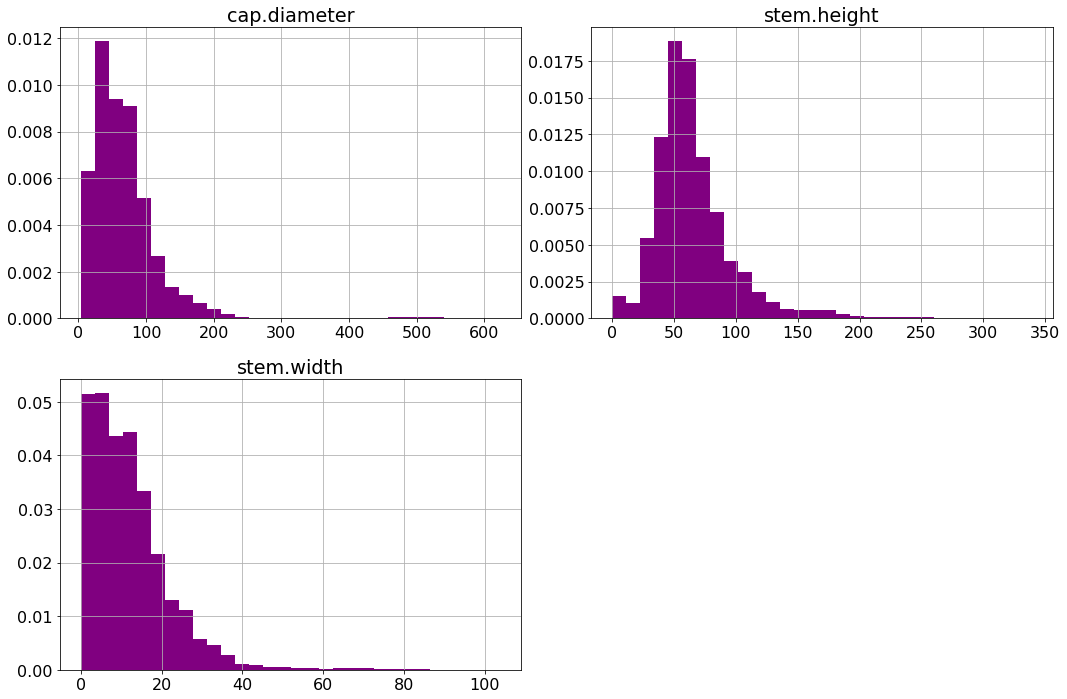

<Figure size 432x288 with 0 Axes>

In [26]:
df.hist(bins=30, figsize=(15, 10), color = "purple", density=True )
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/DMSL project/MushroomDataset/nominalDistribution.png', transparent=True)

In [27]:
df_imputted[['stem.color','class']].value_counts()

stem.color  class    
white       edible       13143
brown       poisonous    10755
white       poisonous     9783
brown       edible        7308
yellow      poisonous     5371
            edible        2494
gray        edible        1594
red         poisonous     1512
orange      poisonous     1329
none        poisonous     1059
gray        poisonous     1032
purple      poisonous      957
pink        poisonous      893
orange      edible         858
black       poisonous      648
red         edible         538
purple      edible         533
green       poisonous      428
black       edible         189
buff        edible         173
pink        edible         132
blue        poisonous      121
green       edible         114
blue        edible         105
dtype: int64

# Elastic Net

In [28]:
def run_elastic_net(x_train, y_train):

  # Train model and fit
  elastic_model = ElasticNetCV(cv=10, random_state=42).fit(x_train, y_train)

  # perform permutation importance
  results = permutation_importance(elastic_model, x_train, y_train, scoring='neg_mean_squared_error')

  # get importance
  importance = results.importances_mean

  # summarize feature importance
  # for feature_ind, score in enumerate(importance):
  #   print('Feature: %0d, Score: %.5f' % (feature_ind, score))

  
  # create an ordered dict
  from collections import OrderedDict
  from operator import itemgetter

  l = OrderedDict(sorted(enumerate(importance), key=itemgetter(1), reverse=True))

  print("Feature Importance using Negative MSE score\n")
  for key, val in l.items():
      print('Feature: %0d, Score: %.5f' % (key, val))
  
  # plot feature importance
  figure(figsize=(8, 6), dpi=80)
  plt.bar([x for x in range(len(importance))], importance, align='center', color='limegreen')
  plt.ylabel("Negative MSE score")
  plt.xlabel('Features')
  plt.title("Feature importance using Elastic Net")
  plt.show()
  plt.close()

# run_elastic_net(X_train, y_train)

# Modeling on full dataset

In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

def run_random_forest(X_train, y_train):

    # import packages
    from sklearn.ensemble import RandomForestClassifier


    # Train Model
    clf = RandomForestClassifier()
    n_trees = list(np.arange(1,201,2))
    clf_gs = GridSearchCV(estimator=clf,
                        param_grid={'n_estimators':n_trees},
                        scoring='recall', cv=cv, n_jobs=-1)
    

    # Return fitted model
    return clf.fit(X_train,y_train)

def run_svm(X_train, y_train):

    from sklearn.svm import SVC
    # Create Model
    clf = SVC(probability=True)

    # Train Model
    clf_gs = GridSearchCV(estimator=clf,
                        param_grid={'C':[0.1,1,10,100],'gamma':['scale','auto'], 'kernel':['rbf','sigmoid']},
                        scoring='recall', cv=cv, n_jobs=-1)
    

    # Fit Model
    return clf.fit(X_train,y_train)

def run_xgboost(X_train, y_train):
    from xgboost import XGBClassifier

    # define the model
    clf = XGBClassifier(feature_names=X_train.columns)

    # Train Model
    params = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
            }

    clf_gs = GridSearchCV(estimator=clf,
                        param_grid= params,
                        scoring='recall',cv=cv, n_jobs=-1)
    

    # Fit Model
    return clf.fit(X_train,y_train)

def run_logit(X_train, y_train):

    from sklearn.linear_model import LogisticRegression

    # Train Model
    clf = LogisticRegression()
    C_params = np.linspace(0.001, 2, 100)
    clf_gs = GridSearchCV(estimator=clf,
                            param_grid={'penalty':['l1','l2'],'C':C_params},
                            scoring='recall', cv=cv, n_jobs=-1)

    # Fit Model
    return clf.fit(X_train,y_train)

def run_neural_net(X_train, y_train):
  from sklearn.neural_network import MLPClassifier
  parameters = {'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(10, 40), 
                'activation': ['logistic', 'relu'], 'learning_rate_init' : [0.05]}

  clf = MLPClassifier()

  # clf_gs = GridSearchCV(clf, parameters, cv=cv, n_jobs=-1)

  return clf.fit(X_train,y_train)



def run_lda(X_train, y_train):
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

  # Train Model
  clf = LDA(n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001) # need to do grid search 

  return clf.fit(X_train, y_train)


In [30]:
def get_accuracy(model_name, model, X_test, y_test):
    pred_y = model.predict(X_test)
    model_accuracy = np.round(accuracy_score(y_test, pred_y),4)
    cm = confusion_matrix(y_test, pred_y)
    precision,recall,fscore,support = score(y_true=y_test,y_pred=pred_y)

    print('Model results for {}'.format(model_name))
    print('Accuracy Score: {}'.format(model_accuracy))
    print('Confusion Matrix: \n {}'.format(cm))
    
    class_list = [x for x in range(0, 2)]
    data_dict = {'Class':class_list,'Precision':precision,'Recall':recall,'F-1 Score':fscore}
    model_dataframe = pd.DataFrame(data_dict)
    if model_name == 'Neural Network':
        print(pred_y.cv_results_)
    print(model_dataframe)
    print('-------------------------------')
    
    return model_dataframe

In [31]:
# Run  Model
rf = run_random_forest(X_train, np.ravel(y_train))

# Print Results
get_accuracy('Random Forest:', rf, X_test, y_test)

Model results for Random Forest:
Accuracy Score: 0.9985
Confusion Matrix: 
 [[5361   13]
 [   5 6835]]
   Class  Precision    Recall  F-1 Score
0      0   0.999068  0.997581   0.998324
1      1   0.998102  0.999269   0.998685
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.999068,0.997581,0.998324
1,1,0.998102,0.999269,0.998685


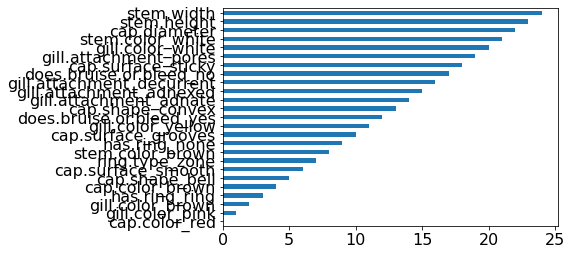

In [32]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).argsort()[::-1].plot(kind='barh', fontsize=16)
plt.show()

In [33]:
# Run  Model
lda = run_lda(X_train, np.ravel(y_train))

# Print Results
get_accuracy('lda:', lda, X_test, y_test)

Model results for lda:
Accuracy Score: 0.7731
Confusion Matrix: 
 [[4012 1362]
 [1409 5431]]
   Class  Precision    Recall  F-1 Score
0      0   0.740085  0.746557   0.743307
1      1   0.799499  0.794006   0.796743
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.740085,0.746557,0.743307
1,1,0.799499,0.794006,0.796743


In [34]:
# Run  Model
logit = run_logit(X_train, np.ravel(y_train))

# Print Results
get_accuracy('Logistic Regression:', logit, X_test, y_test)

Model results for Logistic Regression:
Accuracy Score: 0.7739
Confusion Matrix: 
 [[4000 1374]
 [1387 5453]]
   Class  Precision    Recall  F-1 Score
0      0   0.742528  0.744325   0.743425
1      1   0.798740  0.797222   0.797981
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.742528,0.744325,0.743425
1,1,0.798740,0.797222,0.797981


In [35]:
# Run  Model
svm = run_svm(X_train, np.ravel(y_train))

# Print Results
get_accuracy('SVM:', svm, X_test, y_test)

Model results for SVM:
Accuracy Score: 0.9939
Confusion Matrix: 
 [[5310   64]
 [  10 6830]]
   Class  Precision    Recall  F-1 Score
0      0   0.998120  0.988091   0.993080
1      1   0.990717  0.998538   0.994612
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.998120,0.988091,0.993080
1,1,0.990717,0.998538,0.994612


In [36]:
# show tree from random forest
# rf_estimators = rf.estimators_[0]
# dot_data = export_graphviz(rf_estimators, out_file=None, 
#                 feature_names = X_scaled_df.columns,
#                 class_names = ['edible','poisonous'],
#                 rounded = True, proportion = False, 
#                 precision = 1, filled = True)
# graph=pydot.graph_from_dot_data(dot_data)
# Image(graph[0].create_png())

In [37]:
# Run  Model
xgboost = run_xgboost(X_train, np.ravel(y_train))

# Print Results
get_accuracy('XGBoost:', xgboost, X_test, y_test)

[20:31:55] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

Model results for XGBoost:
Accuracy Score: 0.9978
Confusion Matrix: 
 [[5358   16]
 [  11 6829]]
   Class  Precision    Recall  F-1 Score
0      0   0.997951  0.997023   0.997487
1      1   0.997663  0.998392   0.998027
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.997951,0.997023,0.997487
1,1,0.997663,0.998392,0.998027


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

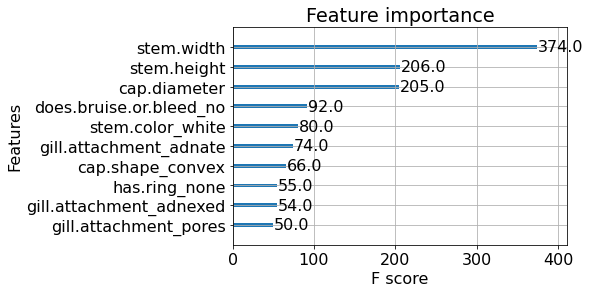

In [38]:
from xgboost import plot_importance
plot_importance(xgboost, max_num_features=10)

In [39]:
# Run  Model
nn = run_neural_net(X_train, np.ravel(y_train))

# Print Results
get_accuracy('Neural Network:', nn, X_test, y_test)

Model results for Neural Network:
Accuracy Score: 0.9984
Confusion Matrix: 
 [[5362   12]
 [   7 6833]]
   Class  Precision    Recall  F-1 Score
0      0   0.998696  0.997767   0.998231
1      1   0.998247  0.998977   0.998612
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.998696,0.997767,0.998231
1,1,0.998247,0.998977,0.998612


In [40]:
## AUC curve
def plot_roc(model, X_test, y_test, plot_title):
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)

  figure(figsize=(3,3))
  # create ROC curve
  lw = 2
  figure(figsize=(8, 6), dpi=80)
  plt.plot(fpr,tpr,lw=lw, label='ROC curve (area = %0.4f)' %auc, color='darkorange')
  plt.plot([0,1],[0,1],'g--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(plot_title)
  plt.legend(loc=4)
  plt.show()

<Figure size 216x216 with 0 Axes>

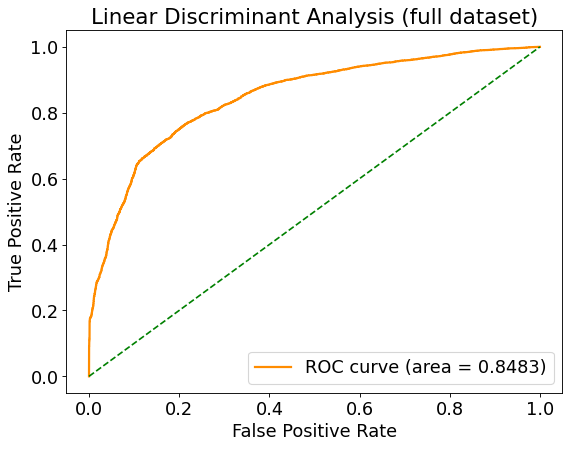

In [41]:
plot_roc(lda, X_test, y_test, "Linear Discriminant Analysis (full dataset)")


<Figure size 216x216 with 0 Axes>

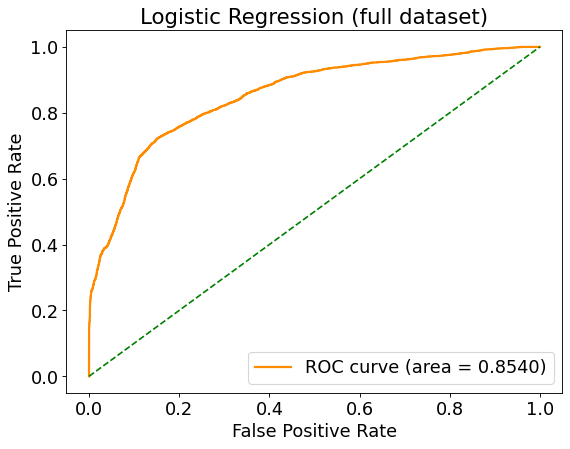

In [42]:
plot_roc(logit, X_test, y_test, "Logistic Regression (full dataset)")


<Figure size 216x216 with 0 Axes>

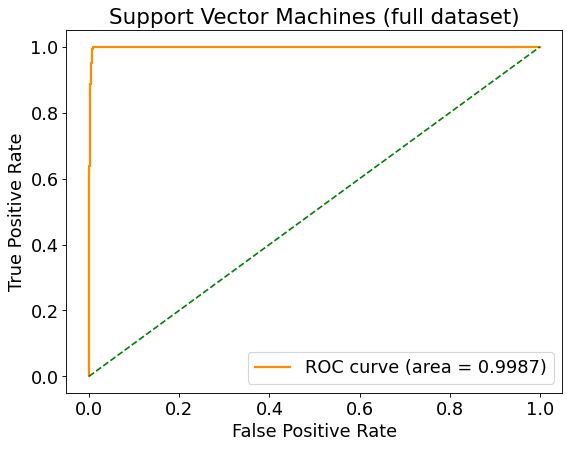

In [43]:

plot_roc(svm, X_test, y_test, "Support Vector Machines (full dataset)")

<Figure size 216x216 with 0 Axes>

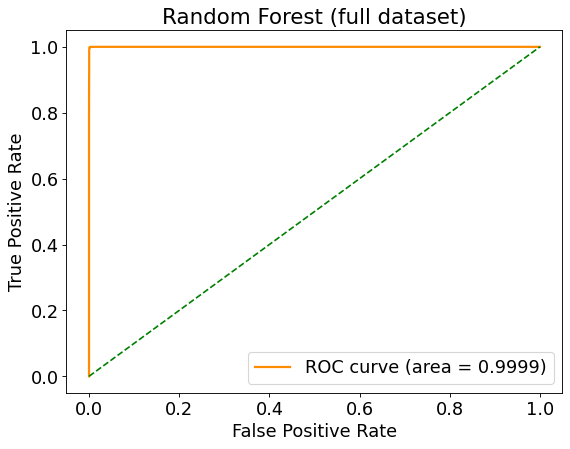

In [44]:

plot_roc(rf, X_test, y_test, "Random Forest (full dataset)")


<Figure size 216x216 with 0 Axes>

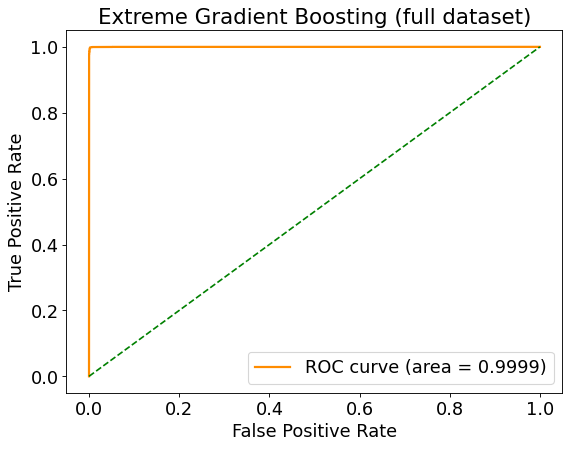

In [45]:
plot_roc(xgboost, X_test, y_test, "Extreme Gradient Boosting (full dataset)")


<Figure size 216x216 with 0 Axes>

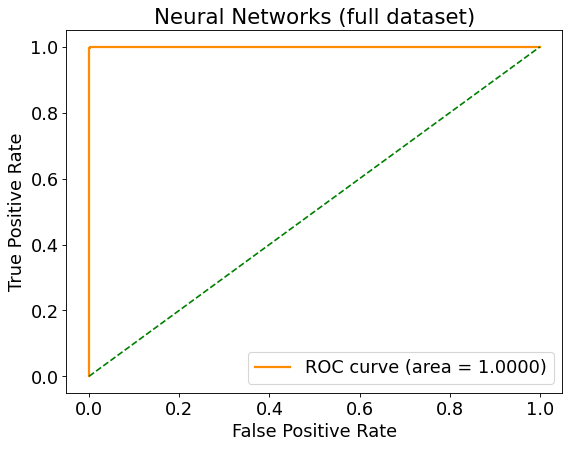

In [46]:
plot_roc(nn, X_test, y_test, "Neural Networks (full dataset)")

# Feature Importance Computed with SHAP Values

In [47]:
# pip install shap

In [48]:
# import shap
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")
# plt.show()
# plt.savefig('/content/drive/MyDrive/DMSL project/MushroomDataset/shapColumns.png', transparent=True)

In [49]:
shap_columns = ['stem.color_white','stem.width','stem.height','cap.diameter','gill.attachment_pores','gill.color_white','cap.shape_bell','gill.attachment_adnate','ring.type_zone','cap.color_red','stem.color_yellow','cap.shape_convex','has.ring_ring','cap.surface_silky',
                'does.bruise.or.bleed_yes','gill.attachment_free','gill.color_yellow','cap.surface_sticky','cap.surface_smooth']

In [50]:
# explainer_xgboost = shap.TreeExplainer(xgboost)
# shap_values_xgboost = explainer_xgboost.shap_values(X_test)
# shap.summary_plot(shap_values_xgboost, X_test, plot_type="bar")


In [51]:
shap_columns_xgboost = ['stem.color_white','stem.width','stem.height','gill.attachment_pores','ring.type_zone','gill.color_white','cap.shape_bell','cap.surface_silky','cap.surface_sticky','cap.color_brown','season_Winter','cap.color_red','does.bruise.or.bleed_no',
                        'cap.diameter','cap.surface_fibrous','cap.color_green','cap.surface_smooth','stem.color_gray','gill.color_yellow','has.ring_none']

# Feature Selection using PowerShap (Shapley values)

In [52]:
# from sklearn.linear_model import LogisticRegressionCV
# selector = PowerShap(model = LogisticRegressionCV(max_iter=100), automatic=True, limit_automatic=50)
# selector.fit(X_train, y_train)

In [53]:
# selector.transform(X_test)

In [54]:
# selector._processed_shaps_df

In [55]:
# selector2 = PowerShap(
#     model = GradientBoostingClassifier(),
#     automatic=True, limit_automatic=100)
# selector2.fit(X_train, y_train)
# selector2.transform(X_test)
# selector2._processed_shaps_df

In [58]:
# powerShap_df = selector._processed_shaps_df
# powerShap_df2 = selector2._processed_shaps_df

In [59]:
# powerShap_df = powerShap_df.sort_values('impact', ascending=False)
# powerShap_df2 = powerShap_df2.sort_values('impact', ascending=False)
# powerShap_df = powerShap_df.head(25)
# powerShap_df2 = powerShap_df2.head(10)

In [60]:
# powerShap_cols1 = set(powerShap_df.index.tolist())
# powerShap_cols = powerShap_df2.index.tolist()
# powerShap_cols = powerShap_cols1.intersection(powerShap_cols2)
# powerShap_cols

# Modeling with grid search

In [61]:

# def run_rf_gs(X_train, y_train):

#     # import packages
#     from sklearn.ensemble import RandomForestClassifier


#     # Train Model
#     clf = RandomForestClassifier()
#     n_trees = list(np.arange(1,201,2))
#     clf_gs = GridSearchCV(estimator=clf,
#                         param_grid={'n_estimators':n_trees},
#                         scoring='recall', cv=cv, n_jobs=-1)
    

#     # Return fitted model
#     return clf_gs.fit(X_train,y_train)

# def run_svm_gs(X_train, y_train):

#     from sklearn.svm import SVC
#     # Create Model
#     clf = SVC()

#     # Train Model
#     clf_gs = GridSearchCV(estimator=clf,
#                         param_grid={'C':[0.1,1,10,100],'gamma':['scale','auto'], 'kernel':['rbf','sigmoid']},
#                         scoring='recall', cv=cv, n_jobs=-1)
    

#     # Fit Model
#     return clf_gs.fit(X_train,y_train)

# def run_xgboost_gs(X_train, y_train):
#     from xgboost import XGBClassifier

#     # define the model
#     clf = XGBClassifier(feature_names=X_train.columns)

#     # Train Model
#     params = {
#             'min_child_weight': [1, 5, 10],
#             'gamma': [0.5, 1, 1.5, 2, 5],
#             'subsample': [0.6, 0.8, 1.0],
#             'colsample_bytree': [0.6, 0.8, 1.0],
#             'max_depth': [3, 4, 5]
#             }

#     clf_gs = GridSearchCV(estimator=clf,
#                         param_grid= params,
#                         scoring='recall',cv=cv, n_jobs=-1)
    

#     # Fit Model
#     return clf_gs.fit(X_train,y_train)

# def run_logit_gs(X_train, y_train):

#     from sklearn.linear_model import LogisticRegression

#     # Train Model
#     clf = LogisticRegression()
#     C_params = np.linspace(0.001, 2, 100)
#     clf_gs = GridSearchCV(estimator=clf,
#                             param_grid={'penalty':['l1','l2'],'C':C_params},
#                             scoring='recall', cv=cv, n_jobs=-1)

#     # Fit Model
#     return clf_gs.fit(X_train,y_train)

# def run_nn_gs(X_train, y_train):
#   from sklearn.neural_network import MLPClassifier
#   parameters = {'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(10, 40), 
#                 'activation': ['logistic', 'relu'], 'learning_rate_init' : [0.05]}

#   clf = MLPClassifier()

#   clf_gs = GridSearchCV(clf, parameters, cv=cv, n_jobs=-1)

#   return clf_gs.fit(X_train,y_train)


In [62]:
# # # Run  Model
# rf_gs = run_rf_gs(X_train, np.ravel(y_train))

# # # Print Results
# get_accuracy('Random Forest gs:', rf_gs, X_test, y_test)

In [63]:
# # Run  Model
# logit_gs = run_logit_gs(X_train, np.ravel(y_train))

# # Print Results
# get_accuracy('Logistic Regression gs:', logit_gs, X_test, y_test)

In [64]:
# # Run  Model
# svm_gs = run_svm_gs(X_train, np.ravel(y_train))

# # Print Results
# get_accuracy('SVM with Grid Search:', svm_gs, X_test, y_test)

In [65]:
# Run  Model
# xgboost_gs = run_xgboost_gs(X_train, np.ravel(y_train))

# # Print Results
# get_accuracy('XGBoost with Grid Search:', xgboost_gs, X_test, y_test)

In [66]:
# # Run  Model
# nn_gs = run_nn_gs(X_train, np.ravel(y_train))

# # Print Results
# get_accuracy('Neural Network:', nn_gs, X_test, y_test)

# Modeling with subset data

In [67]:
shap_df = df_dummies[df_dummies.columns & shap_columns]
print(shap_df.shape)
shap_df.head()

(61069, 19)


<ipython-input-67-34eb38ac1b86>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shap_df = df_dummies[df_dummies.columns & shap_columns]


,cap.diameter,stem.height,stem.width,cap.shape_bell,cap.shape_convex,cap.surface_silky,cap.surface_smooth,cap.surface_sticky,cap.color_red,does.bruise.or.bleed_yes,gill.attachment_adnate,gill.attachment_free,gill.attachment_pores,gill.color_white,gill.color_yellow,stem.color_white,stem.color_yellow,has.ring_ring,ring.type_zone
0,152.6,169.5,17.09,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
1,166.0,179.9,18.19,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,140.7,178.0,17.74,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
3,141.7,157.7,15.98,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
4,146.4,165.3,17.20,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [68]:
# scale the data
shap_df_subset = shap_df.copy()
X_scaled_subset = StandardScaler().fit_transform(shap_df_subset)
X_scaled_subset_df = pd.DataFrame(X_scaled_subset, index=X.index, columns=shap_df.columns)

# train/test split
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_scaled_subset_df, y, test_size=0.20, random_state=42)

# label encode response variable
label_encoder_subset = LabelEncoder()
label_encoder_subset.fit(y_train_subset)
y_train_subset = label_encoder_subset.transform(y_train_subset)
y_test_subset = label_encoder_subset.transform(y_test_subset)

In [69]:
# Run  Model
lda_subset = run_lda(X_train_subset, np.ravel(y_train_subset))

# Print Results
get_accuracy('lda:', lda_subset, X_test_subset, y_test_subset)

Model results for lda:
Accuracy Score: 0.7084
Confusion Matrix: 
 [[3333 2041]
 [1521 5319]]
   Class  Precision    Recall  F-1 Score
0      0    0.68665  0.620208   0.651740
1      1    0.72269  0.777632   0.749155
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.68665,0.620208,0.651740
1,1,0.72269,0.777632,0.749155


In [70]:
# Run  Model
logit_subset = run_logit(X_train_subset, np.ravel(y_train_subset))

# Print Results
get_accuracy('Logistic Regression:', logit_subset, X_test_subset, y_test_subset)

Model results for Logistic Regression:
Accuracy Score: 0.7057
Confusion Matrix: 
 [[3317 2057]
 [1537 5303]]
   Class  Precision    Recall  F-1 Score
0      0   0.683354  0.617231   0.648612
1      1   0.720516  0.775292   0.746901
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.683354,0.617231,0.648612
1,1,0.720516,0.775292,0.746901


In [71]:
# Run  Model
svm_subset = run_svm(X_train_subset, np.ravel(y_train_subset))

# Print Results
get_accuracy('SVM:', svm_subset, X_test_subset, y_test_subset)

Model results for SVM:
Accuracy Score: 0.953
Confusion Matrix: 
 [[5101  273]
 [ 301 6539]]
   Class  Precision    Recall  F-1 Score
0      0   0.944280  0.949200   0.946733
1      1   0.959924  0.955994   0.957955
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.944280,0.949200,0.946733
1,1,0.959924,0.955994,0.957955


In [72]:
# Run  Model
rf_subset = run_random_forest(X_train_subset, np.ravel(y_train_subset))

# Print Results
get_accuracy('Random Forest:', rf_subset, X_test_subset, y_test_subset)

Model results for Random Forest:
Accuracy Score: 0.9942
Confusion Matrix: 
 [[5332   42]
 [  29 6811]]
   Class  Precision    Recall  F-1 Score
0      0   0.994591  0.992185   0.993386
1      1   0.993871  0.995760   0.994815
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.994591,0.992185,0.993386
1,1,0.993871,0.995760,0.994815


In [73]:
# #show tree from random forest
# rf_estimators_subset = rf.estimators_[0]
# dot_data_subset = export_graphviz(rf_estimators_subset, out_file=None, 
#                 feature_names = X_scaled_subset_df.columns,
#                 class_names = ['edible','poisonous'],
#                 rounded = True, proportion = False, 
#                 precision = 1, filled = True)
# graph_subset=pydot.graph_from_dot_data(dot_data_subset)
# Image(graph_subset[0].create_png())

In [74]:
# Run  Model
xgboost_subset = run_xgboost(X_train_subset, np.ravel(y_train_subset))

# Print Results
get_accuracy('XGBoost:', xgboost_subset, X_test_subset, y_test_subset)

[20:44:10] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

Model results for XGBoost:
Accuracy Score: 0.9905
Confusion Matrix: 
 [[5317   57]
 [  59 6781]]
   Class  Precision    Recall  F-1 Score
0      0   0.989025  0.989393   0.989209
1      1   0.991664  0.991374   0.991519
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.989025,0.989393,0.989209
1,1,0.991664,0.991374,0.991519


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

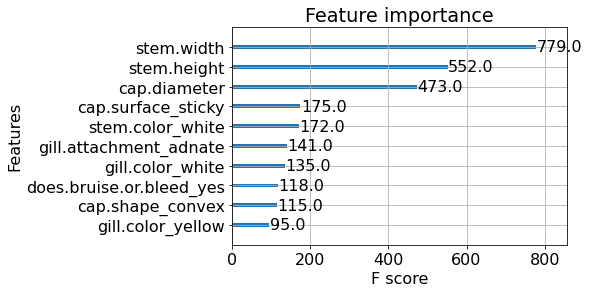

In [75]:
plot_importance(xgboost_subset, max_num_features=10)

In [76]:
# Run  Model
nn_subset = run_neural_net(X_train_subset, np.ravel(y_train_subset))

# Print Results
get_accuracy('Neural Network:', nn_subset, X_test_subset, y_test_subset)

Model results for Neural Network:
Accuracy Score: 0.9928
Confusion Matrix: 
 [[5335   39]
 [  49 6791]]
   Class  Precision    Recall  F-1 Score
0      0   0.990899  0.992743   0.991820
1      1   0.994290  0.992836   0.993563
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.990899,0.992743,0.991820
1,1,0.994290,0.992836,0.993563


<Figure size 216x216 with 0 Axes>

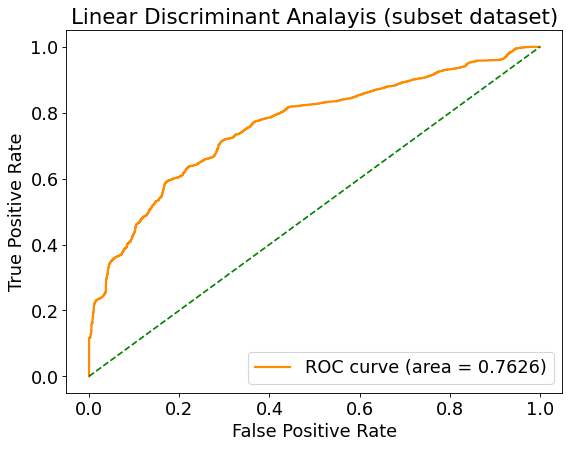

In [77]:
plot_roc(lda_subset, X_test_subset, y_test_subset, "Linear Discriminant Analayis (subset dataset)")


<Figure size 216x216 with 0 Axes>

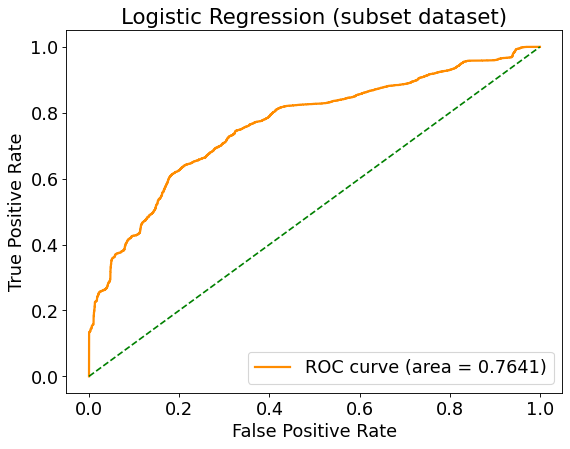

In [78]:
plot_roc(logit_subset, X_test_subset, y_test_subset, "Logistic Regression (subset dataset)")


<Figure size 216x216 with 0 Axes>

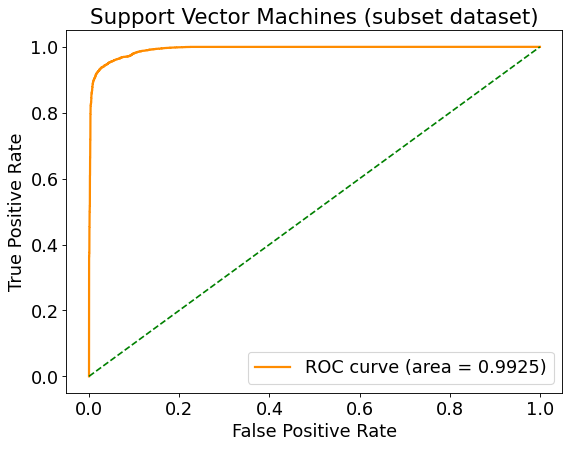

In [79]:
plot_roc(svm_subset, X_test_subset, y_test_subset, "Support Vector Machines (subset dataset)")

<Figure size 216x216 with 0 Axes>

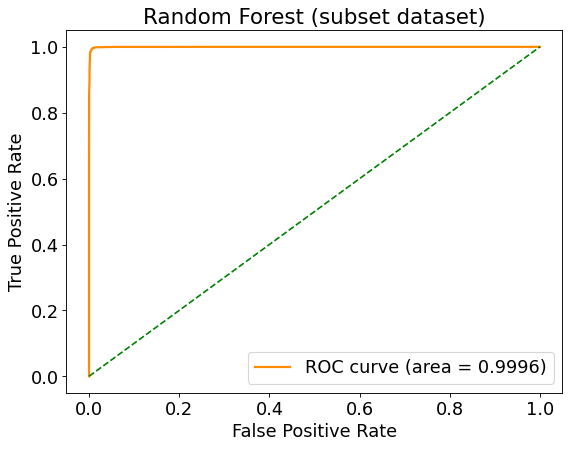

In [80]:
plot_roc(rf_subset, X_test_subset, y_test_subset, "Random Forest (subset dataset)")


<Figure size 216x216 with 0 Axes>

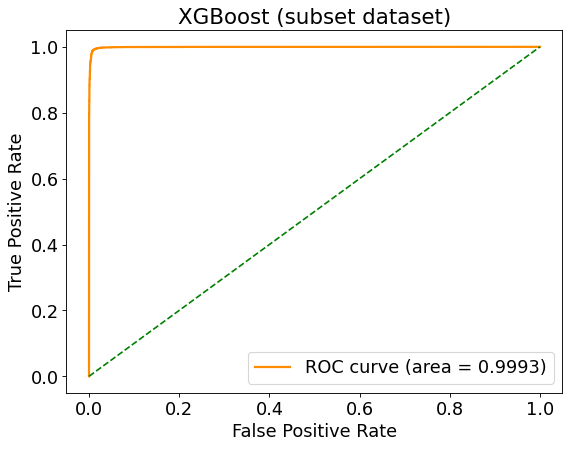

In [81]:
plot_roc(xgboost_subset, X_test_subset, y_test_subset, "XGBoost (subset dataset)")


<Figure size 216x216 with 0 Axes>

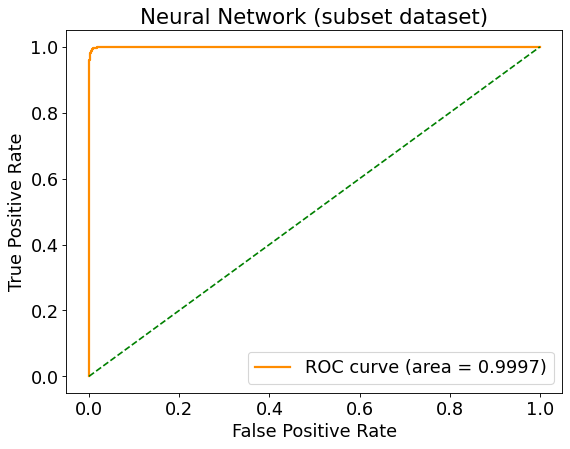

In [82]:
plot_roc(nn_subset, X_test_subset, y_test_subset, "Neural Network (subset dataset)")


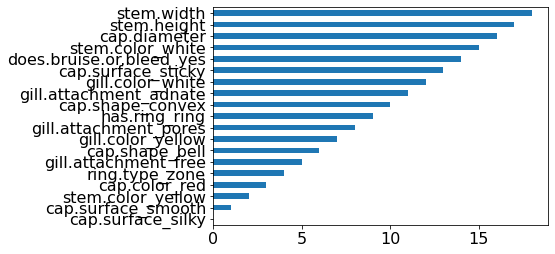

In [83]:
feat_importances_subset = pd.Series(rf_subset.feature_importances_, index=X_train_subset.columns)
feat_importances_subset.nlargest(25).argsort()[::-1].plot(kind='barh', fontsize=16)
plt.show()

# Modeling without outliers on full dataset

In [84]:
drop_df = df_dummies.copy(deep=True)
drop_y = y.drop(y.index[outliers]).reset_index(drop=True)
drop_df = drop_df.drop(drop_df.index[outliers]).reset_index(drop=True)
print(drop_df.shape)
drop_df.head()

(55728, 87)


,cap.diameter,stem.height,stem.width,cap.shape_bell,cap.shape_conical,cap.shape_convex,cap.shape_flat,cap.shape_others,cap.shape_spherical,cap.shape_sunken,...,habitat_Heaths,habitat_Leaves,habitat_Meadows,habitat_Urban,habitat_Waste,habitat_Woods,season_Autumn,season_Spring,season_Summer,season_Winter
0,68.7,68.8,13.64,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,85.9,91.5,17.34,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,59.5,75.4,12.73,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,65.1,68.0,12.92,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,76.6,85.5,14.98,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [85]:
# scale the data
X_scaled_drop = StandardScaler().fit_transform(drop_df)
X_scaled_drop_df = pd.DataFrame(X_scaled_drop, index=drop_df.index, columns=drop_df.columns)

# train/test split
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_scaled_drop_df, drop_y, test_size=0.20, random_state=42)

# label encode response variable
label_encoder_drop = LabelEncoder()
label_encoder_drop.fit(y_train_drop)
y_train_drop = label_encoder_drop.transform(y_train_drop)
y_test_drop = label_encoder_drop.transform(y_test_drop)

In [86]:
# Run  Model
lda_drop = run_lda(X_train_drop, np.ravel(y_train_drop))

# Print Results
get_accuracy('lda:', lda_drop, X_test_drop, y_test_drop)

Model results for lda:
Accuracy Score: 0.7805
Confusion Matrix: 
 [[3685 1137]
 [1310 5014]]
   Class  Precision    Recall  F-1 Score
0      0   0.737738  0.764206   0.750739
1      1   0.815152  0.792853   0.803848
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.737738,0.764206,0.750739
1,1,0.815152,0.792853,0.803848


In [87]:
logit_drop = run_logit(X_train_drop, np.ravel(y_train_drop))

get_accuracy('Logistic Regression:', logit_drop, X_test_drop, y_test_drop)

Model results for Logistic Regression:
Accuracy Score: 0.7797
Confusion Matrix: 
 [[3643 1179]
 [1276 5048]]
   Class  Precision    Recall  F-1 Score
0      0   0.740598  0.755496   0.747972
1      1   0.810663  0.798229   0.804398
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.740598,0.755496,0.747972
1,1,0.810663,0.798229,0.804398


In [88]:
# Run  Model
svm_drop = run_svm(X_train_drop, np.ravel(y_train_drop))

# Print Results
get_accuracy('SVM:', svm_drop, X_test_drop, y_test_drop)

Model results for SVM:
Accuracy Score: 0.9935
Confusion Matrix: 
 [[4774   48]
 [  25 6299]]
   Class  Precision    Recall  F-1 Score
0      0   0.994791  0.990046   0.992412
1      1   0.992437  0.996047   0.994239
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.994791,0.990046,0.992412
1,1,0.992437,0.996047,0.994239


In [89]:
# Run  Model
rf_drop = run_random_forest(X_train_drop, np.ravel(y_train_drop))

# Print Results
get_accuracy('Random Forest:', rf_drop, X_test_drop, y_test_drop)

Model results for Random Forest:
Accuracy Score: 0.9987
Confusion Matrix: 
 [[4811   11]
 [   4 6320]]
   Class  Precision    Recall  F-1 Score
0      0   0.999169  0.997719   0.998443
1      1   0.998263  0.999367   0.998815
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.999169,0.997719,0.998443
1,1,0.998263,0.999367,0.998815


In [90]:

# show tree from random forest
# rf_estimators_drop = rf_drop.estimators_[0]
# dot_data_drop = export_graphviz(rf_estimators_drop, out_file=None, 
#                 feature_names = X_scaled_drop_df.columns,
#                 class_names = ['edible','poisonous'],
#                 rounded = True, proportion = False, 
#                 precision = 1, filled = True)
# graph_drop=pydot.graph_from_dot_data(dot_data_drop)
# Image(graph_drop[0].create_png())

In [91]:

# Run  Model
xgboost_drop = run_xgboost(X_train_drop, np.ravel(y_train_drop))

# Print Results
get_accuracy('XGBoost:', xgboost_drop, X_test_drop, y_test_drop)

[20:49:04] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

Model results for XGBoost:
Accuracy Score: 0.9983
Confusion Matrix: 
 [[4813    9]
 [  10 6314]]
   Class  Precision    Recall  F-1 Score
0      0   0.997927  0.998134   0.998030
1      1   0.998577  0.998419   0.998498
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.997927,0.998134,0.998030
1,1,0.998577,0.998419,0.998498


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

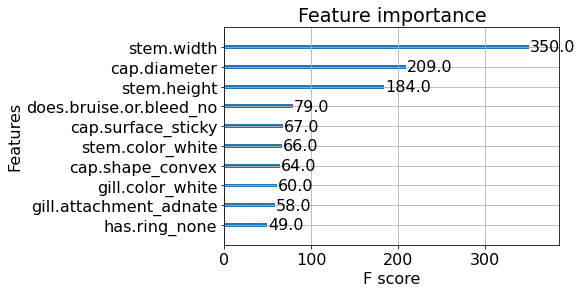

In [92]:
plot_importance(xgboost_drop, max_num_features=10)

In [93]:
# Run  Model
nn_drop = run_neural_net(X_train_drop, np.ravel(y_train_drop))

# Print Results
get_accuracy('Neural Network:', nn_drop, X_test_drop, y_test_drop)

Model results for Neural Network:
Accuracy Score: 0.9984
Confusion Matrix: 
 [[4804   18]
 [   0 6324]]
   Class  Precision    Recall  F-1 Score
0      0   1.000000  0.996267   0.998130
1      1   0.997162  1.000000   0.998579
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,1.000000,0.996267,0.998130
1,1,0.997162,1.000000,0.998579


<Figure size 216x216 with 0 Axes>

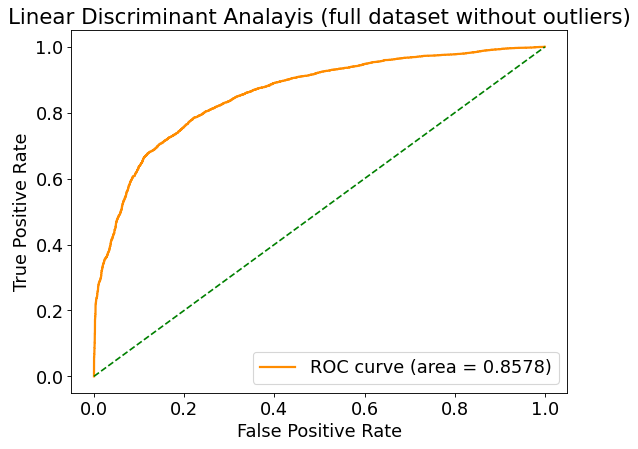

In [94]:
plot_roc(lda_drop, X_test_drop, y_test_drop, "Linear Discriminant Analayis (full dataset without outliers)")


<Figure size 216x216 with 0 Axes>

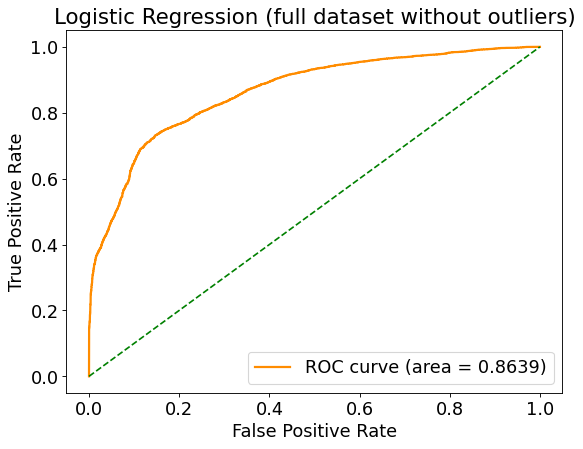

In [95]:
plot_roc(logit_drop, X_test_drop, y_test_drop, "Logistic Regression (full dataset without outliers)")


<Figure size 216x216 with 0 Axes>

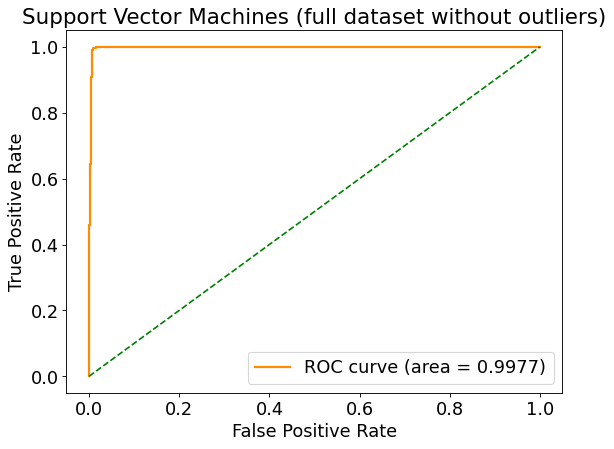

In [96]:
plot_roc(svm_drop, X_test_drop, y_test_drop, "Support Vector Machines (full dataset without outliers)")

<Figure size 216x216 with 0 Axes>

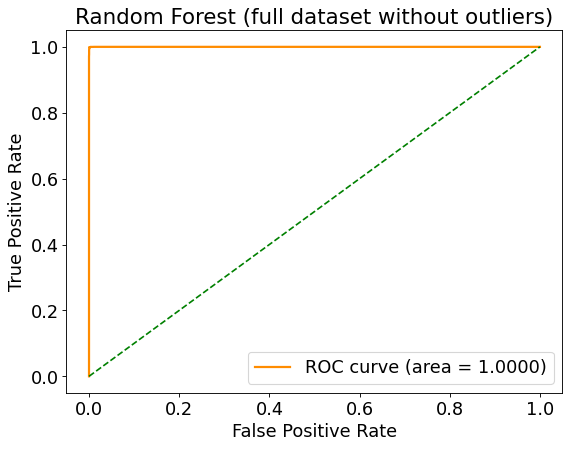

In [97]:
plot_roc(rf_drop, X_test_drop, y_test_drop, "Random Forest (full dataset without outliers)")


<Figure size 216x216 with 0 Axes>

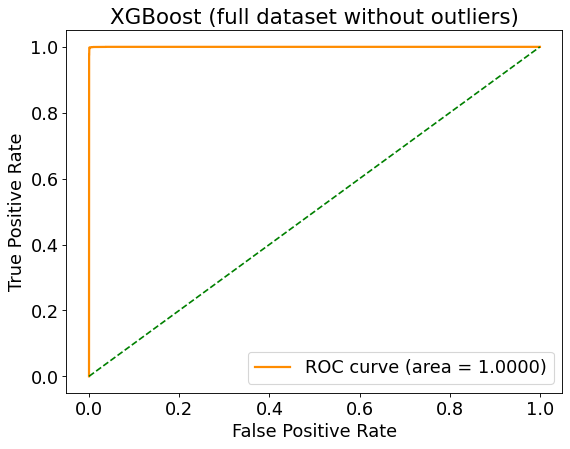

In [98]:
plot_roc(xgboost_drop, X_test_drop, y_test_drop, "XGBoost (full dataset without outliers)")


<Figure size 216x216 with 0 Axes>

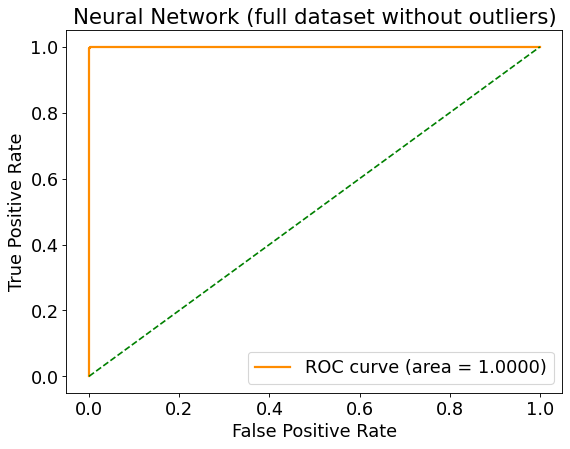

In [99]:
plot_roc(nn_drop, X_test_drop, y_test_drop, "Neural Network (full dataset without outliers)")


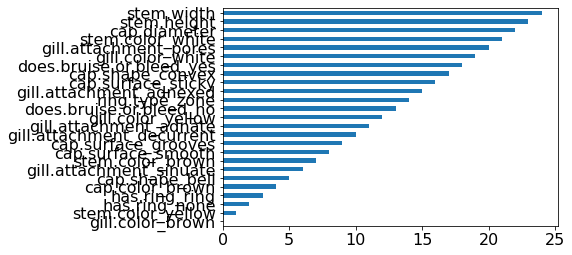

In [100]:
feat_importances_drop = pd.Series(rf_drop.feature_importances_, index=X_train_drop.columns)
feat_importances_drop.nlargest(25).argsort()[::-1].plot(kind='barh', fontsize=16)
plt.show()

# Modeling on subset data without outliers

In [101]:
clean_df = df_dummies[df_dummies.columns & shap_columns]
clean_df = clean_df.drop(clean_df.index[outliers]).reset_index(drop=True)
print(clean_df.shape)
clean_df.head()

(55728, 19)


<ipython-input-101-38ab4a79f29b>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  clean_df = df_dummies[df_dummies.columns & shap_columns]


,cap.diameter,stem.height,stem.width,cap.shape_bell,cap.shape_convex,cap.surface_silky,cap.surface_smooth,cap.surface_sticky,cap.color_red,does.bruise.or.bleed_yes,gill.attachment_adnate,gill.attachment_free,gill.attachment_pores,gill.color_white,gill.color_yellow,stem.color_white,stem.color_yellow,has.ring_ring,ring.type_zone
0,68.7,68.8,13.64,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
1,85.9,91.5,17.34,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,59.5,75.4,12.73,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
3,65.1,68.0,12.92,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,76.6,85.5,14.98,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [102]:
# scale the data
X_scaled_clean = StandardScaler().fit_transform(clean_df)
X_scaled_clean_df = pd.DataFrame(X_scaled_clean, index=clean_df.index, columns=clean_df.columns)

# train/test split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_scaled_clean_df, drop_y, test_size=0.20, random_state=42)

# label encode response variable
label_encoder_clean = LabelEncoder()
label_encoder_clean.fit(y_train_clean)
y_train_clean = label_encoder_clean.transform(y_train_clean)
y_test_clean = label_encoder_clean.transform(y_test_clean)

In [103]:
# Run  Model
lda_clean = run_lda(X_train_clean, np.ravel(y_train_clean))

# Print Results
get_accuracy('lda:', lda_clean, X_test_clean, y_test_clean)

Model results for lda:
Accuracy Score: 0.6988
Confusion Matrix: 
 [[2868 1954]
 [1403 4921]]
   Class  Precision    Recall  F-1 Score
0      0   0.671506  0.594774   0.630815
1      1   0.715782  0.778147   0.745663
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.671506,0.594774,0.630815
1,1,0.715782,0.778147,0.745663


In [104]:
# Run  Model
logit_clean = run_logit(X_train_clean, np.ravel(y_train_clean))

# Print Results
get_accuracy('Logistic Regression:', logit_clean, X_test_clean, y_test_clean)

Model results for Logistic Regression:
Accuracy Score: 0.7003
Confusion Matrix: 
 [[2852 1970]
 [1370 4954]]
   Class  Precision    Recall  F-1 Score
0      0   0.675509  0.591456   0.630694
1      1   0.715482  0.783365   0.747886
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.675509,0.591456,0.630694
1,1,0.715482,0.783365,0.747886


In [105]:
# Run  Model
svm_clean = run_svm(X_train_clean, np.ravel(y_train_clean))

# Print Results
get_accuracy('SVM:', svm_clean, X_test_clean, y_test_clean)

Model results for SVM:
Accuracy Score: 0.9586
Confusion Matrix: 
 [[4643  179]
 [ 283 6041]]
   Class  Precision    Recall  F-1 Score
0      0   0.942550  0.962878   0.952606
1      1   0.971222  0.955250   0.963170
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.942550,0.962878,0.952606
1,1,0.971222,0.955250,0.963170


In [106]:

# Run  Model
rf_clean = run_random_forest(X_train_clean, np.ravel(y_train_clean))

# Print Results
get_accuracy('Random Forest:', rf_clean, X_test_clean, y_test_clean)

Model results for Random Forest:
Accuracy Score: 0.9932
Confusion Matrix: 
 [[4777   45]
 [  31 6293]]
   Class  Precision    Recall  F-1 Score
0      0   0.993552  0.990668   0.992108
1      1   0.992900  0.995098   0.993998
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.993552,0.990668,0.992108
1,1,0.992900,0.995098,0.993998


In [107]:

# show tree from random forest
# rf_estimators_clean = rf_clean.estimators_[0]
# dot_data_clean = export_graphviz(rf_estimators_clean, out_file=None, 
#                 feature_names = X_scaled_clean_df.columns,
#                 class_names = ['edible','poisonous'],
#                 rounded = True, proportion = False, 
#                 precision = 1, filled = True)
# graph_clean=pydot.graph_from_dot_data(dot_data_clean)
# Image(graph_clean[0].create_png())

In [108]:
# Run  Model
xgboost_clean = run_xgboost(X_train_clean, np.ravel(y_train_clean))

# Print Results
get_accuracy('XGBoost:', xgboost_clean, X_test_clean, y_test_clean)

[20:53:13] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

Model results for XGBoost:
Accuracy Score: 0.9915
Confusion Matrix: 
 [[4772   50]
 [  45 6279]]
   Class  Precision    Recall  F-1 Score
0      0   0.990658  0.989631   0.990144
1      1   0.992100  0.992884   0.992492
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.990658,0.989631,0.990144
1,1,0.992100,0.992884,0.992492


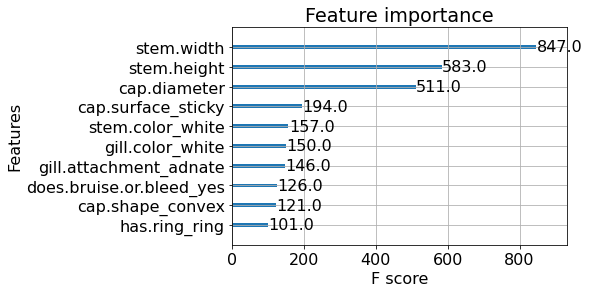

In [109]:
plot_importance(xgboost_clean, max_num_features=10)
plt.show()

In [110]:
# Run  Model
nn_clean = run_neural_net(X_train_clean, np.ravel(y_train_clean))

# Print Results
get_accuracy('Neural Network:', nn_clean, X_test_clean, y_test_clean)

Model results for Neural Network:
Accuracy Score: 0.9926
Confusion Matrix: 
 [[4769   53]
 [  29 6295]]
   Class  Precision    Recall  F-1 Score
0      0   0.993956  0.989009   0.991476
1      1   0.991651  0.995414   0.993529
-------------------------------


,Class,Precision,Recall,F-1 Score
0,0,0.993956,0.989009,0.991476
1,1,0.991651,0.995414,0.993529


<Figure size 216x216 with 0 Axes>

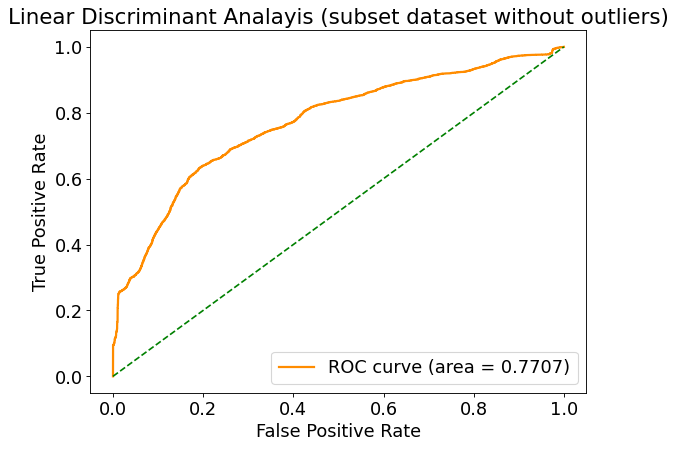

In [111]:

plot_roc(lda_clean, X_test_clean, y_test_clean, "Linear Discriminant Analayis (subset dataset without outliers)")


<Figure size 216x216 with 0 Axes>

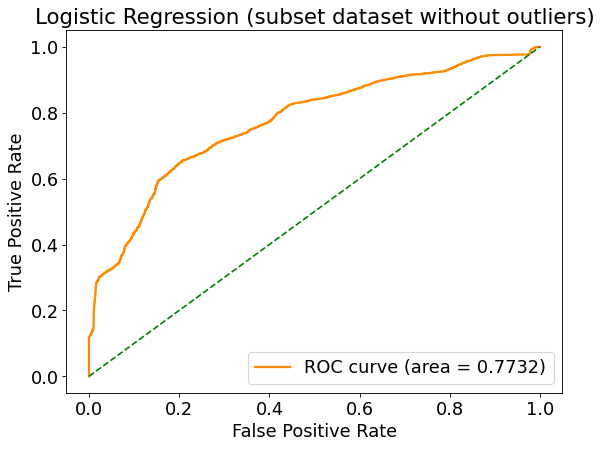

In [112]:
plot_roc(logit_clean, X_test_clean, y_test_clean, "Logistic Regression (subset dataset without outliers)")


<Figure size 216x216 with 0 Axes>

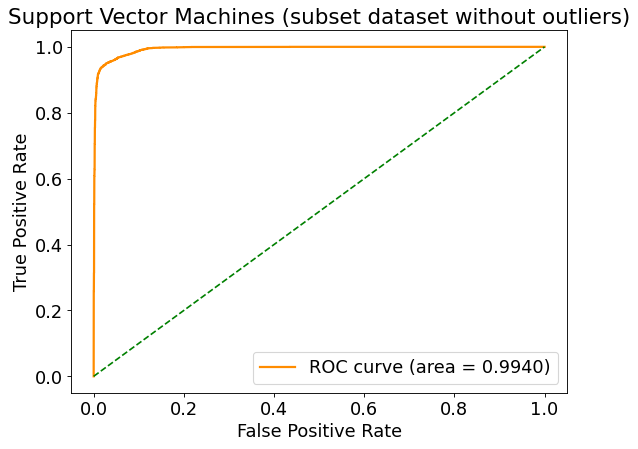

In [113]:
plot_roc(svm_clean, X_test_clean, y_test_clean, "Support Vector Machines (subset dataset without outliers)")


<Figure size 216x216 with 0 Axes>

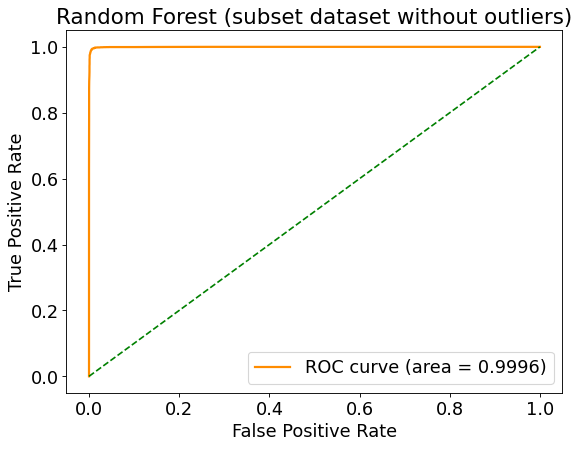

In [114]:
plot_roc(rf_clean, X_test_clean, y_test_clean, "Random Forest (subset dataset without outliers)")


<Figure size 216x216 with 0 Axes>

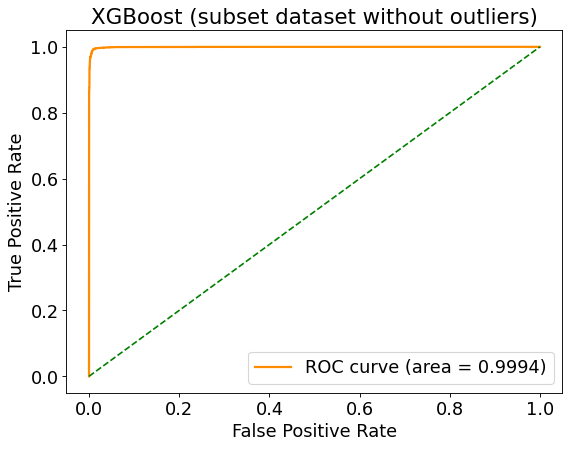

In [115]:
plot_roc(xgboost_clean, X_test_clean, y_test_clean, "XGBoost (subset dataset without outliers)")


<Figure size 216x216 with 0 Axes>

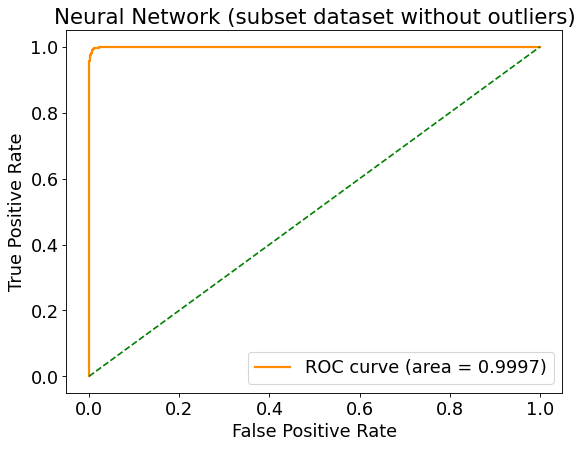

In [116]:
plot_roc(nn_clean, X_test_clean, y_test_clean, "Neural Network (subset dataset without outliers)")

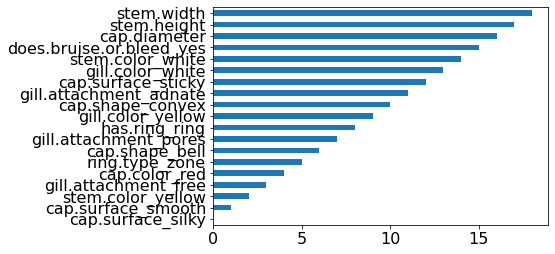

In [117]:
feat_importances_clean = pd.Series(rf_clean.feature_importances_, index=X_train_clean.columns)
feat_importances_clean.nlargest(25).argsort()[::-1].plot(kind='barh', fontsize=16)
plt.show()

# Feature Selection Using PowerSHAP Without Outliers

In [118]:
# clean_df2 = df_dummies[df_dummies.columns & powerShap_cols]
# clean_df2 = clean_df2.drop(clean_df2.index[outliers]).reset_index(drop=True)
# print(clean_df2.shape)
# clean_df2.head()

In [119]:
# # scale the data
# X_scaled_clean2 = StandardScaler().fit_transform(clean_df2)
# X_scaled_clean_df2 = pd.DataFrame(X_scaled_clean2, index=clean_df2.index, columns=clean_df2.columns)

# # train/test split
# X_train_clean2, X_test_clean2, y_train_clean2, y_test_clean2 = train_test_split(X_scaled_clean_df2, drop_y, test_size=0.20, random_state=42)

# # label encode response variable
# label_encoder_clean2 = LabelEncoder()
# label_encoder_clean2.fit(y_train_clean2)
# y_train_clean2 = label_encoder_clean2.transform(y_train_clean2)
# y_test_clean2 = label_encoder_clean2.transform(y_test_clean2)

In [120]:
# # Run  Model
# lda_clean2 = run_lda(X_train_clean2, np.ravel(y_train_clean2))

# # Print Results
# get_accuracy('lda:', lda_clean2, X_test_clean2, y_test_clean2)

In [121]:
# # Run  Model
# logit_clean2 = run_logit(X_train_clean2, np.ravel(y_train_clean2))

# # Print Results
# get_accuracy('Logistic Regression:', logit_clean2, X_test_clean2, y_test_clean2)

In [122]:
# # Run  Model
# svm_clean2 = run_svm(X_train_clean2, np.ravel(y_train_clean2))

# # Print Results
# get_accuracy('SVM:', svm_clean2, X_test_clean2, y_test_clean2)

In [123]:

# # Run  Model
# rf_clean2 = run_random_forest(X_train_clean2, np.ravel(y_train_clean2))

# # Print Results
# get_accuracy('Random Forest:', rf_clean2, X_test_clean2, y_test_clean2)

In [124]:
# show tree from random forest
# rf_estimators_clean2 = rf_clean2.estimators_[0]
# dot_data_clean2 = export_graphviz(rf_estimators_clean2, out_file=None, 
#                 feature_names = X_scaled_clean_df2.columns,
#                 class_names = ['edible','poisonous'],
#                 rounded = True, proportion = False, 
#                 precision = 1, filled = True)
# graph_clean2=pydot.graph_from_dot_data(dot_data_clean2)
# Image(graph_clean2[0].create_png())

In [125]:
# # Run  Model
# xgboost_clean2 = run_xgboost(X_train_clean2, np.ravel(y_train_clean2))

# # Print Results
# get_accuracy('XGBoost:', xgboost_clean2, X_test_clean2, y_test_clean2)

In [126]:
# plot_importance(xgboost_clean2, max_num_features=5)

In [127]:
# # Run  Model
# nn_clean2 = run_neural_net(X_train_clean2, np.ravel(y_train_clean2))

# # Print Results
# get_accuracy('Neural Network:', nn_clean2, X_test_clean2, y_test_clean2)

In [128]:
# plot_roc(lda_clean2, X_test_clean2, y_test_clean2, "Linear discriminat Analysis (PowerShap featues without outliers)")


In [129]:
# plot_roc(logit_clean2, X_test_clean2, y_test_clean2, "Logistic Regression (PowerShap featues without outliers)")


In [130]:
# plot_roc(svm_clean2, X_test_clean2, y_test_clean2, "Support Vector Machines (PowerShap featues without outliers)")


In [131]:
# plot_roc(rf_clean2, X_test_clean2, y_test_clean2, "Random Forest (PowerShap featues without outliers)")


In [132]:
# plot_roc(xgboost_clean2, X_test_clean2, y_test_clean2, "XGBoost (PowerShap featues without outliers)")


In [133]:
# plot_roc(nn_clean2, X_test_clean2, y_test_clean2, "Neural Network (PowerShap featues without outliers)")

In [134]:
# feat_importances_clean2 = pd.Series(rf_clean2.feature_importances_, index=X_train_clean2.columns)
# feat_importances_clean2.nlargest(15).argsort()[::-1].plot(kind='barh')

In [135]:
list1 = feat_importances[0:24]
list2 = feat_importances_subset[0:24]
list3 = feat_importances_drop[0:24]
list4 = feat_importances_clean[0:24]
list5 = list1+list2+list3+list4


<AxesSubplot:>

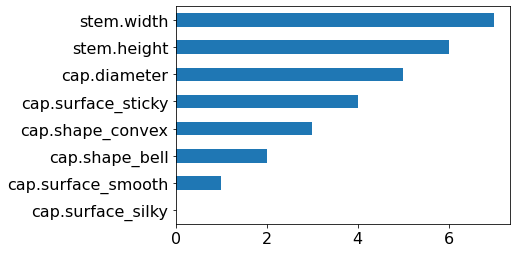

In [136]:
list5.nlargest(20).argsort()[::-1].plot(kind='barh')